In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [2]:
from google.colab import files
uploaded = files.upload()

Saving health_dataset.csv to health_dataset (1).csv


In [3]:
df = pd.read_csv('health_dataset.csv')
df.head()

,ADM_RNO1,Province,Health_region_ grouped,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,...,Physical_vigorous_act_time,Work_hours,working_status,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income
0,1000,47,47906,2,1,2,3,1,3,3,...,10,38,1,2,1,2,1,0,1,5
1,100005,47,47906,1,1,2,5,6,2,3,...,0,96,6,2,1,2,1,0,2,4
2,100012,59,59914,2,2,1,5,6,1,2,...,9996,96,6,2,1,2,6,6,2,2
3,100015,13,13904,1,2,1,5,6,1,3,...,9996,96,6,2,1,2,6,0,2,3
4,100018,46,46903,1,2,1,4,2,3,5,...,9996,96,6,2,1,2,2,0,2,1


# EDA

In [4]:
df.shape

(108252, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108252 entries, 0 to 108251
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ADM_RNO1                    108252 non-null  int64  
 1   Province                    108252 non-null  int64  
 2   Health_region_ grouped      108252 non-null  int64  
 3   Gender                      108252 non-null  int64  
 4   Marital_status              108252 non-null  int64  
 5   Household                   108252 non-null  int64  
 6   Age                         108252 non-null  int64  
 7   Worked_job_business         108252 non-null  int64  
 8   Edu_level                   108252 non-null  int64  
 9   Gen_health_state            108252 non-null  int64  
 10  Life_satisfaction           108252 non-null  int64  
 11  Mental_health_state         108252 non-null  int64  
 12  Stress_level                108252 non-null  int64  
 13  Work_stress   

In [6]:
df.isnull().sum()

,0
ADM_RNO1,0
Province,0
Health_region_ grouped,0
Gender,0
Marital_status,0
Household,0
Age,0
Worked_job_business,0
Edu_level,0
Gen_health_state,0


In [7]:
df.duplicated().sum()

np.int64(0)

<ipython-input-8-ed35c65b006a>:16: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


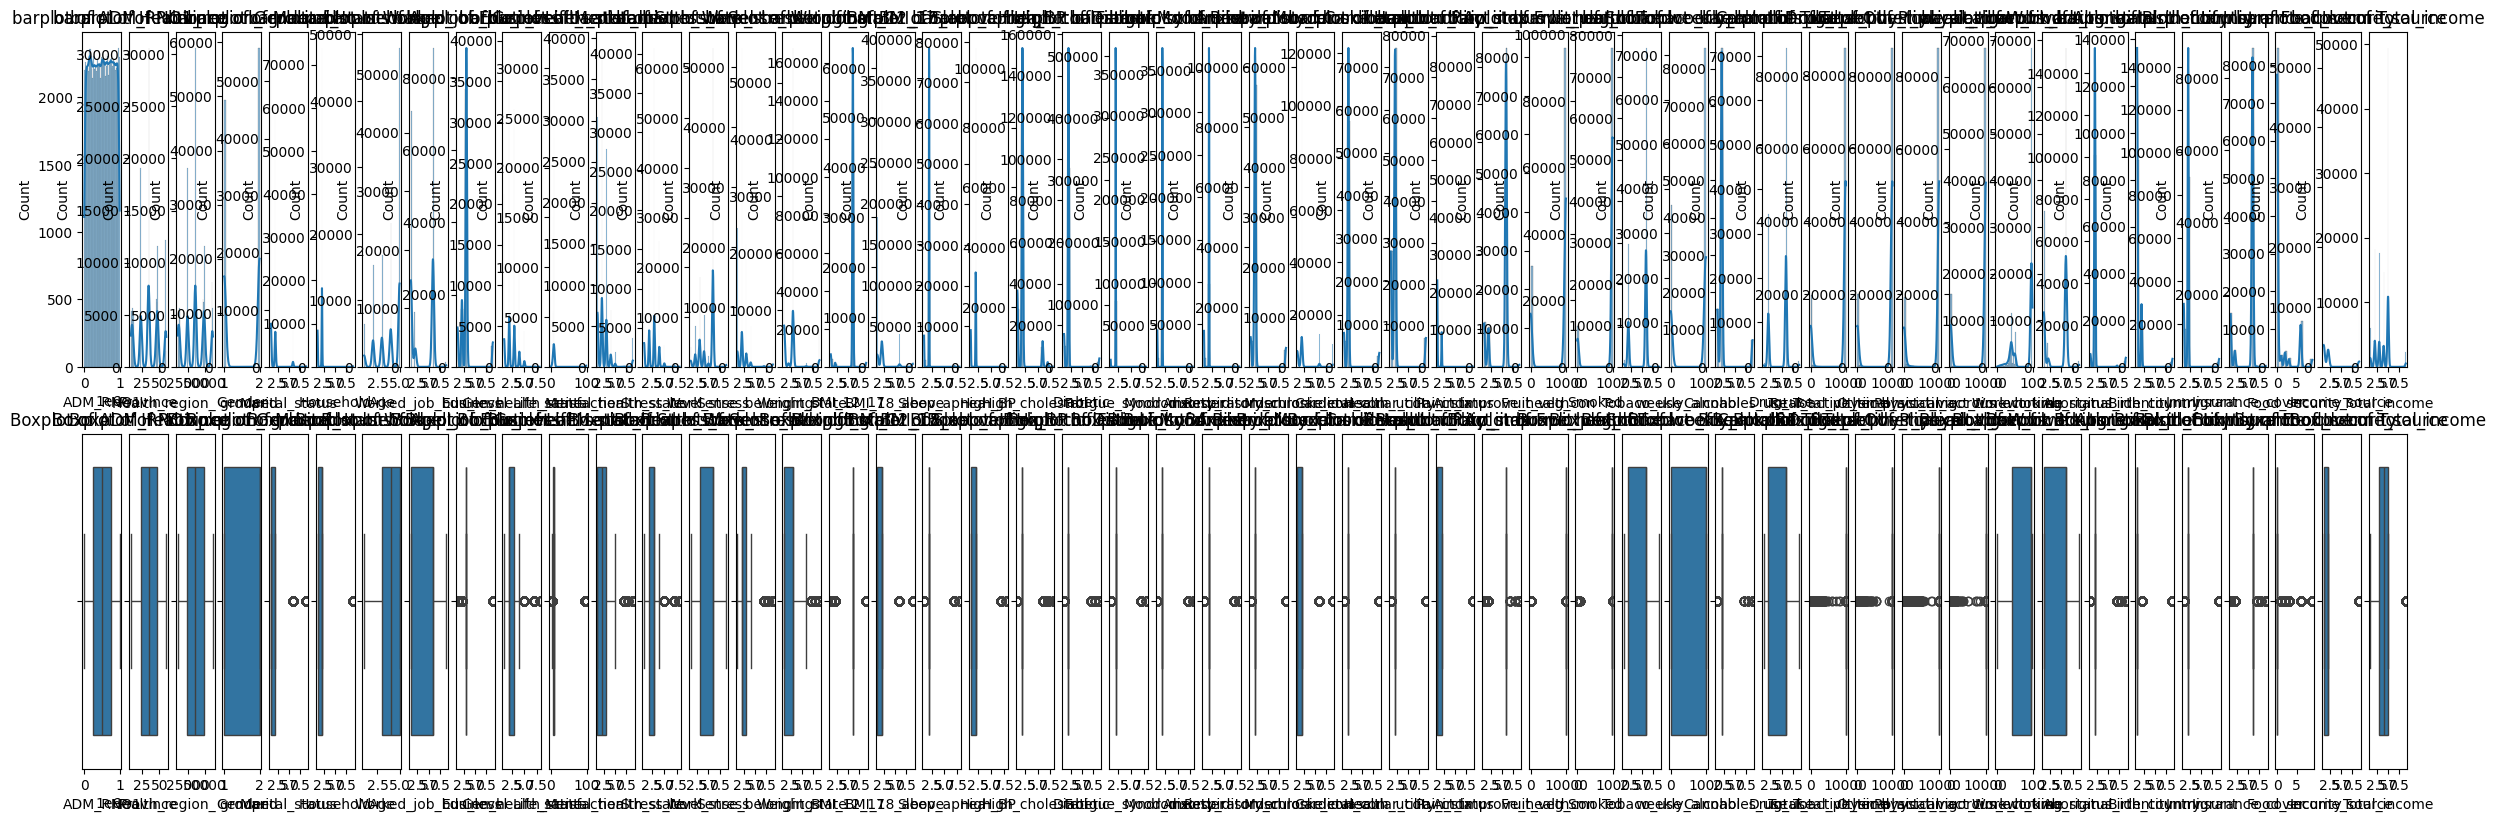

,ADM_RNO1,Province,Health_region_ grouped,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,...,Physical_vigorous_act_time,Work_hours,working_status,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income
count,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.00000,...,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000,108252.000000
mean,501094.332844,34.405683,35330.737908,1.544729,1.748365,1.720763,3.825324,3.659489,3.001912,2.44377,...,8118.493497,75.402496,4.293694,2.171618,1.325407,1.979659,5.151036,1.008101,2.338322,3.897794
std,288978.471309,15.260020,15267.165483,0.497998,1.258188,0.686516,1.293388,2.460041,1.565288,1.06486,...,3897.281466,28.343824,2.385646,1.193865,1.170483,1.071780,1.849489,2.212104,2.488297,1.522599
min,21.000000,10.000000,10911.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,250614.500000,24.000000,24906.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.00000,...,9996.000000,42.000000,1.000000,2.000000,1.000000,2.000000,6.000000,0.000000,1.000000,3.000000
50%,502202.500000,35.000000,35949.000000,2.000000,1.000000,2.000000,4.000000,6.000000,3.000000,2.00000,...,9996.000000,96.000000,6.000000,2.000000,1.000000,2.000000,6.000000,0.000000,2.000000,4.000000
75%,751549.250000,47.000000,47906.000000,2.000000,2.000000,2.000000,5.000000,6.000000,3.000000,3.00000,...,9996.000000,96.000000,6.000000,2.000000,1.000000,2.000000,6.000000,0.000000,2.000000,5.000000
max,999998.000000,60.000000,60901.000000,2.000000,9.000000,9.000000,5.000000,9.000000,9.000000,8.00000,...,9999.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

desc_stats = df[numerical_cols].describe()

plt.figure(figsize=(30, 20))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, len(numerical_cols), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'barplot of {col}')

    plt.subplot(4, len(numerical_cols), i + 1 + len(numerical_cols))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

desc_stats

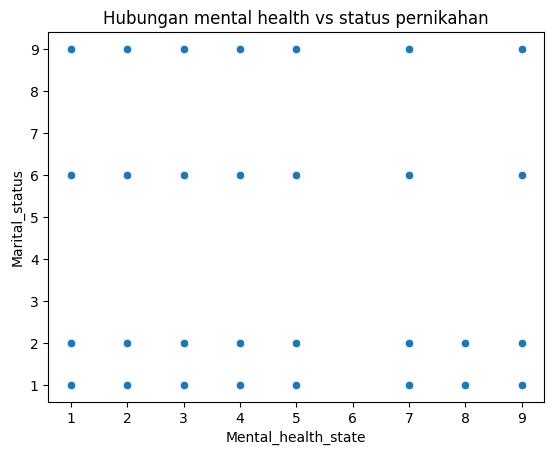

In [9]:
sns.scatterplot(data=df, x='Mental_health_state', y='Marital_status')
plt.title('Hubungan mental health vs status pernikahan')
plt.show()

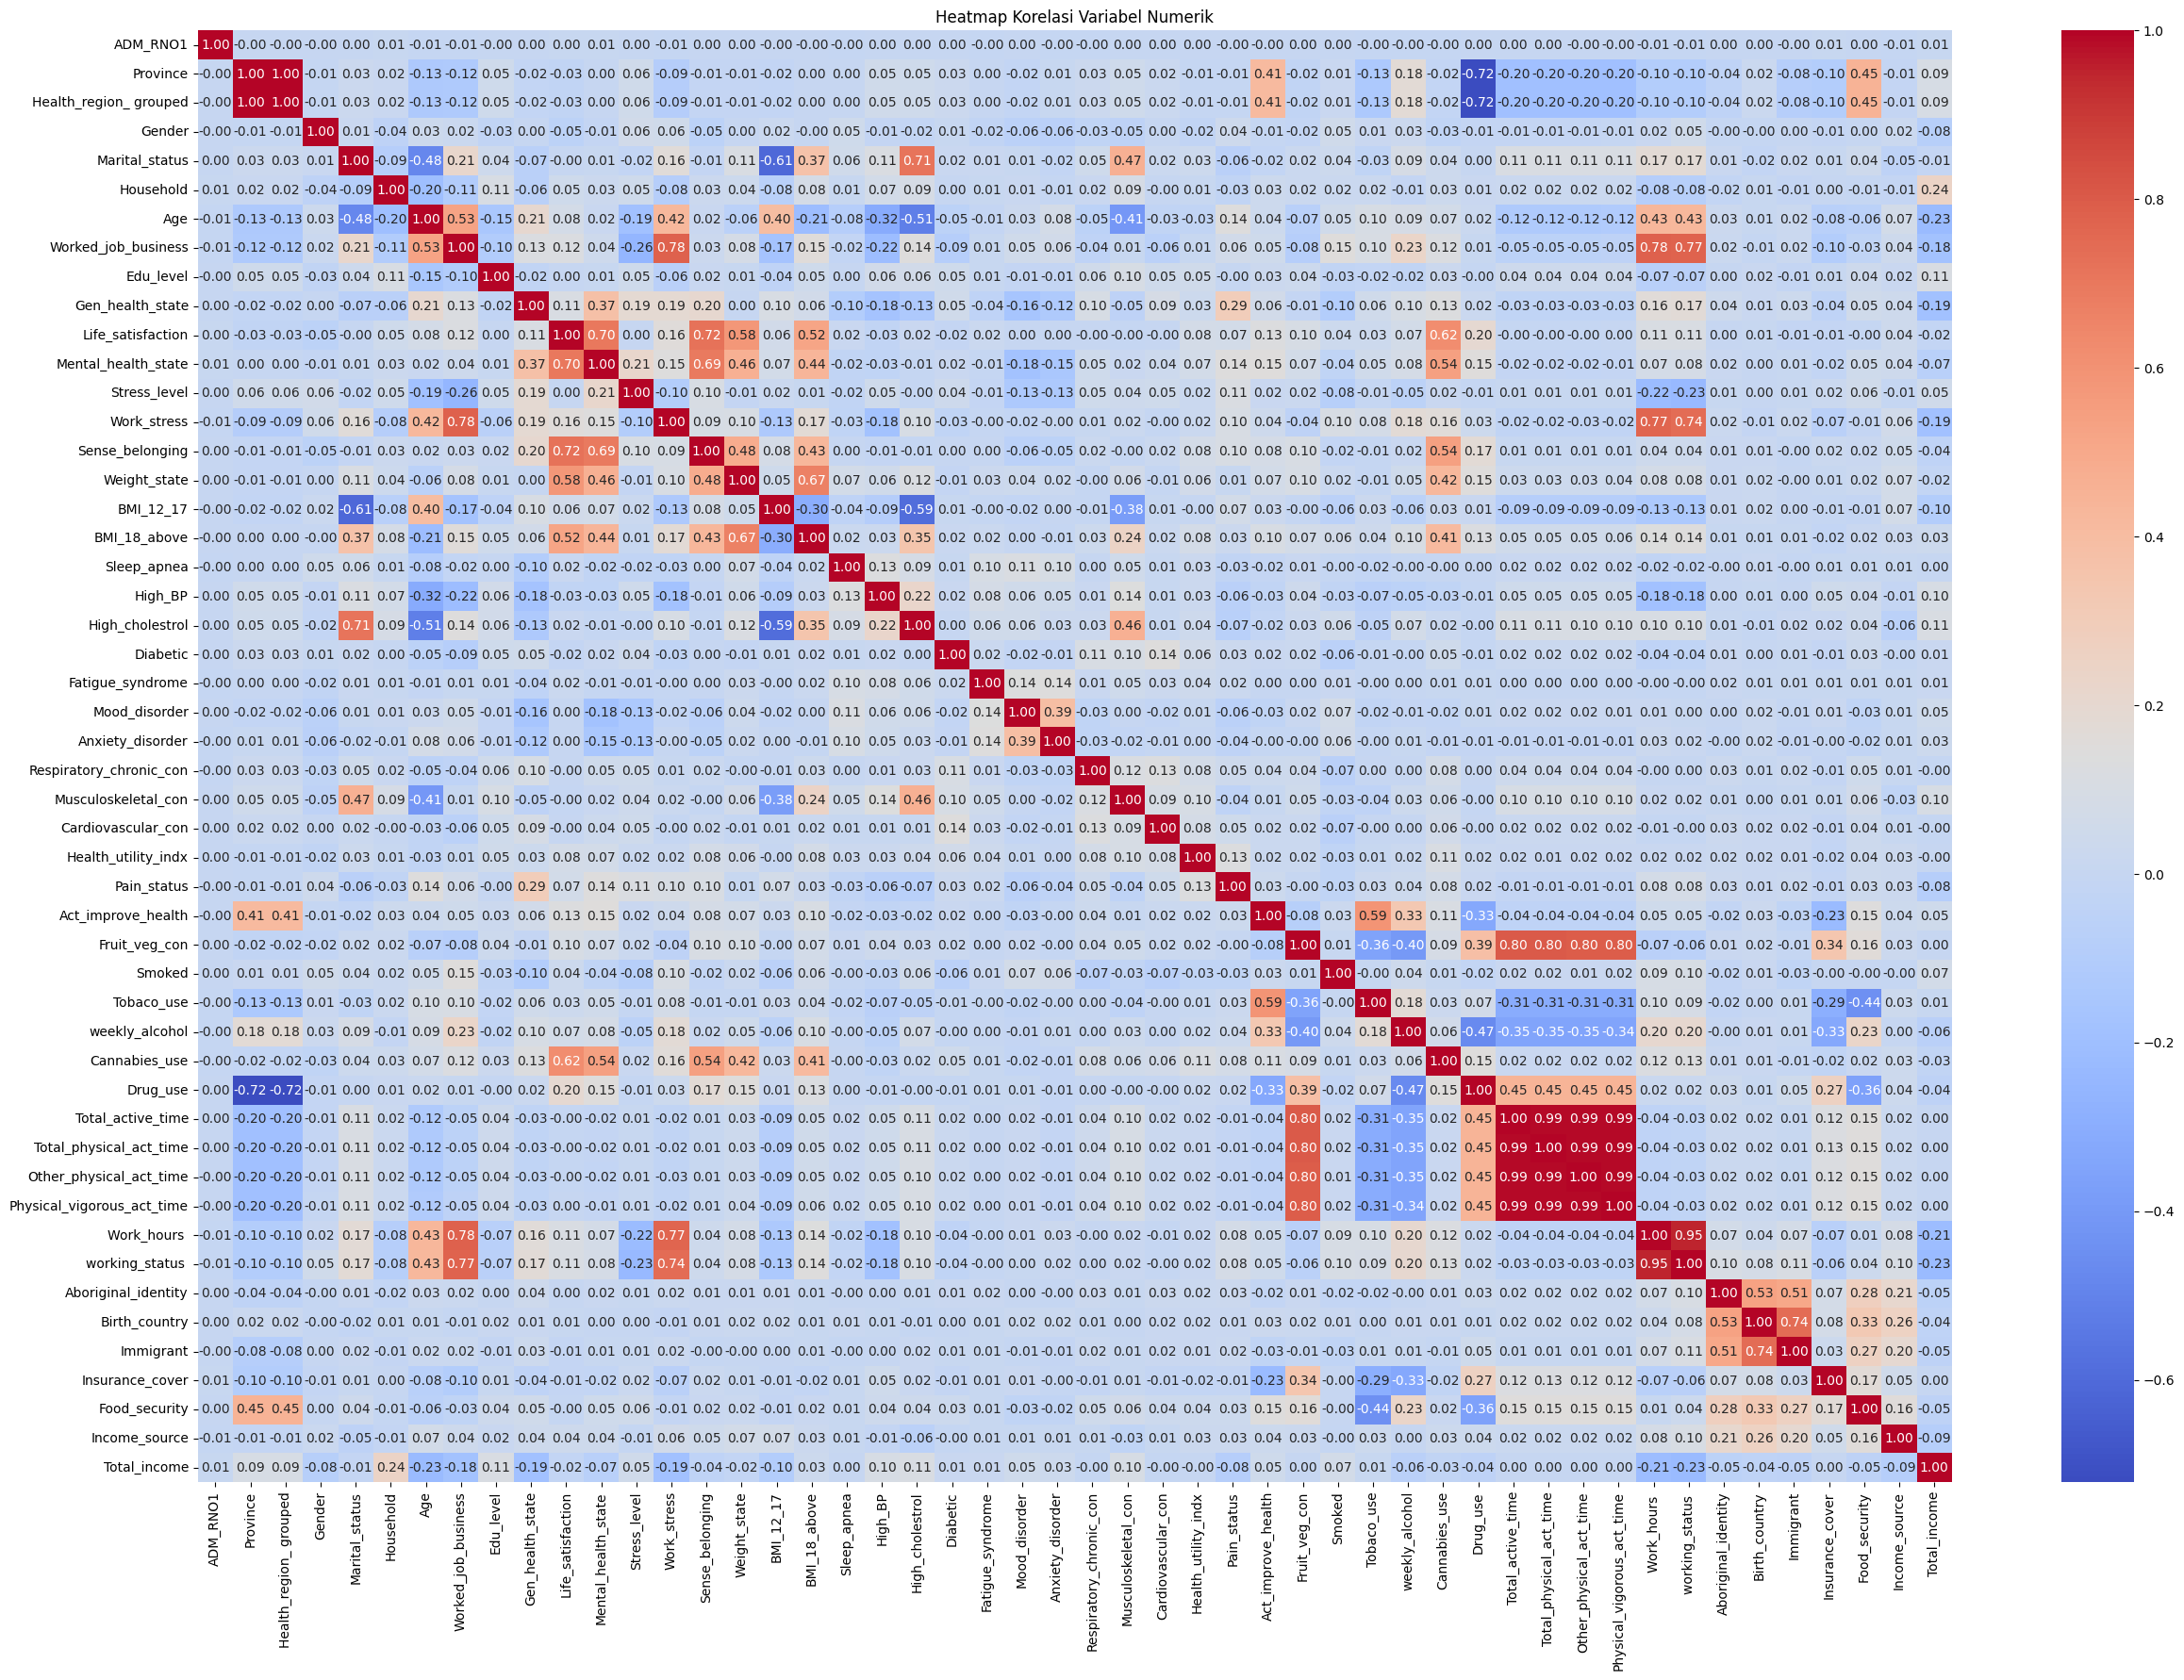

In [10]:
plt.figure(figsize=(30,20))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

# Data Preprocessing

In [11]:
df['Smoked'] = df['Smoked'].fillna(df['Smoked'].median())

In [12]:
df.isnull().sum()

,0
ADM_RNO1,0
Province,0
Health_region_ grouped,0
Gender,0
Marital_status,0
Household,0
Age,0
Worked_job_business,0
Edu_level,0
Gen_health_state,0


In [13]:
selected_columns = [
    'Work_stress', 'Life_satisfaction', 'Mental_health_state', 'Age',
    'Worked_job_business', 'Work_hours ', 'working_status ',
    'Mood_disorder', 'Anxiety_disorder', 'Gen_health_state', 'Marital_status',
    'Gender', 'Total_income'
]
df = df[selected_columns]

In [14]:
df.head()

,Work_stress,Life_satisfaction,Mental_health_state,Age,Worked_job_business,Work_hours,working_status,Mood_disorder,Anxiety_disorder,Gen_health_state,Marital_status,Gender,Total_income
0,2,9,3,3,1,38,1,2,2,3,1,2,5
1,6,4,3,5,6,96,6,1,2,3,1,1,4
2,6,7,3,5,6,96,6,2,2,2,2,2,2
3,6,8,3,5,6,96,6,2,2,3,2,1,3
4,6,0,5,4,2,96,6,2,2,5,2,1,1


In [15]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108252 entries, 0 to 108251
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Work_stress          108252 non-null  int64
 1   Life_satisfaction    108252 non-null  int64
 2   Mental_health_state  108252 non-null  int64
 3   Age                  108252 non-null  int64
 4   Worked_job_business  108252 non-null  int64
 5   Work_hours           108252 non-null  int64
 6   working_status       108252 non-null  int64
 7   Mood_disorder        108252 non-null  int64
 8   Anxiety_disorder     108252 non-null  int64
 9   Gen_health_state     108252 non-null  int64
 10  Marital_status       108252 non-null  int64
 11  Gender               108252 non-null  int64
 12  Total_income         108252 non-null  int64
dtypes: int64(13)
memory usage: 10.7 MB


(108252, 13)

In [16]:
print(df.select_dtypes(include=['float64', 'int64']).columns.tolist())

['Work_stress', 'Life_satisfaction', 'Mental_health_state', 'Age', 'Worked_job_business', 'Work_hours ', 'working_status ', 'Mood_disorder', 'Anxiety_disorder', 'Gen_health_state', 'Marital_status', 'Gender', 'Total_income']


In [17]:
#kode unique

cols = ['Work_stress', 'Life_satisfaction', 'Mental_health_state', 'Age',
        'Worked_job_business', 'Work_hours ', 'working_status ', 'Mood_disorder',
        'Anxiety_disorder', 'Gen_health_state', 'Marital_status', 'Gender', 'Total_income']

for col in cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'Work_stress':
[2 6 4 3 7 1 5 9 8]

Unique values in 'Life_satisfaction':
[ 9  4  7  8  0 10  6  5 99  3  2 97 98  1]

Unique values in 'Mental_health_state':
[3 5 2 1 4 9 7 8]

Unique values in 'Age':
[3 5 4 2 1]

Unique values in 'Worked_job_business':
[1 6 2 9 8 7]

Unique values in 'Work_hours ':
[38 96 50 35 45 40 39 25 30 20 99  6  8 24 32 48 28 42 26 37 15 10 36  9
 44  4 33 49 12 18 43 46  7 29 34 27 16  1 17  3 14 23 21  5  2 47 41 13
 19 22 31 11  0]

Unique values in 'working_status ':
[1 6 2 9]

Unique values in 'Mood_disorder':
[2 1 7 8]

Unique values in 'Anxiety_disorder':
[2 1 7 8]

Unique values in 'Gen_health_state':
[3 2 5 1 4 7 8]

Unique values in 'Marital_status':
[1 2 6 9]

Unique values in 'Gender':
[2 1]

Unique values in 'Total_income':
[5 4 2 3 1 9]


In [18]:
#mengabungkan code

df['Work_stress'] = df['Work_stress'].replace([6, 7, 8, 9], 1)
df['Life_satisfaction'] = df['Life_satisfaction'].replace([97, 98, 99], 00)
df['Mental_health_state'] = df['Mental_health_state'].replace([7, 8, 9], 3)
df['Worked_job_business'] = df['Worked_job_business'].replace([6, 7, 8, 9], 2)
df['Work_hours '] = df['Work_hours '].replace([96, 99], 00)
df['working_status '] = df['working_status '].replace([6], 9)
df['working_status '] = df['working_status '].replace([2], 1)
df['Mood_disorder'] = df['Mood_disorder'].replace([7, 8], 2)
df['Anxiety_disorder'] = df['Anxiety_disorder'].replace([7, 8], 2)
df['Gen_health_state'] = df['Gen_health_state'].replace([6, 9], 4)

In [19]:
df.shape

(108252, 13)

In [20]:
from scipy.stats import zscore

# Hitung z-score
z_scores = np.abs(zscore(df))

# Buang baris dengan z-score > 3 di salah satu kolom
df_clean = df[(z_scores < 3).all(axis=1)]

In [21]:
print(df_clean.shape)
print(df_clean.describe())

(81759, 13)
        Work_stress  Life_satisfaction  Mental_health_state           Age  \
count  81759.000000       81759.000000         81759.000000  81759.000000   
mean       1.834245           8.228966             1.995462      4.033782   
std        1.155341           1.487769             0.863570      1.103417   
min        1.000000           1.000000             1.000000      2.000000   
25%        1.000000           8.000000             1.000000      3.000000   
50%        1.000000           8.000000             2.000000      4.000000   
75%        3.000000           9.000000             3.000000      5.000000   
max        5.000000          10.000000             5.000000      5.000000   

       Worked_job_business   Work_hours   working_status   Mood_disorder  \
count         81759.000000  81759.000000     81759.000000        81759.0   
mean              1.563253     15.077374         5.880490            2.0   
std               0.495986     19.839157         3.901913         

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
X_scaled = pd.DataFrame(X_scaled, columns=df_clean.columns)
X_scaled.head()

,Work_stress,Life_satisfaction,Mental_health_state,Age,Worked_job_business,Work_hours,working_status,Mood_disorder,Anxiety_disorder,Gen_health_state,Marital_status,Gender,Total_income
0,0.143470,0.518252,1.163245,-0.936898,-1.135630,1.155430,-1.250802,0.0,0.0,0.674276,-0.866337,0.933825,0.906169
1,-0.722081,-0.826051,1.163245,0.875665,0.880569,-0.759985,0.799487,0.0,0.0,-0.337453,1.154285,0.933825,-1.375974
2,-0.722081,-0.153900,1.163245,0.875665,0.880569,-0.759985,0.799487,0.0,0.0,0.674276,1.154285,-1.070864,-0.615259
3,-0.722081,-0.826051,0.005255,0.875665,0.880569,-0.759985,0.799487,0.0,0.0,0.674276,-0.866337,0.933825,0.906169
4,-0.722081,-0.153900,1.163245,0.875665,0.880569,-0.759985,0.799487,0.0,0.0,-0.337453,-0.866337,-1.070864,-1.375974


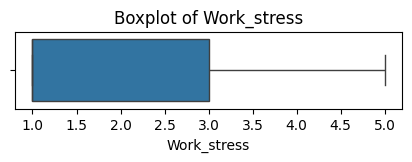

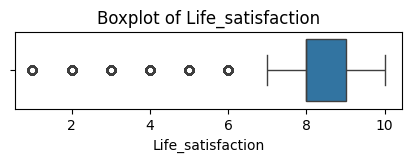

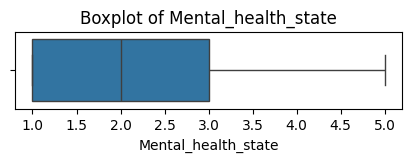

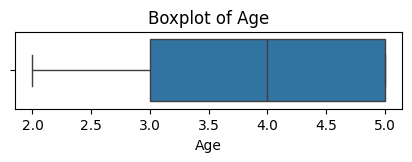

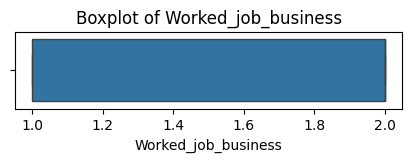

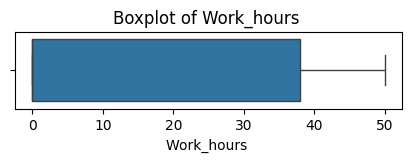

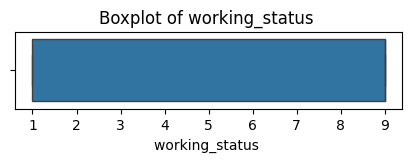

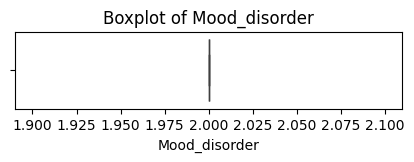

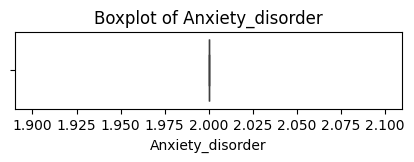

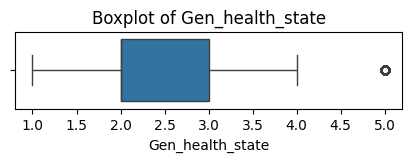

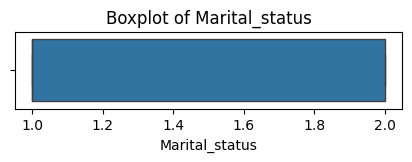

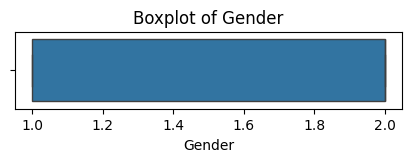

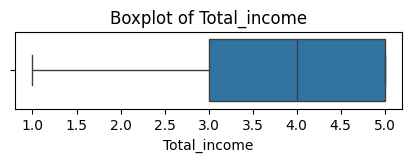

In [23]:
for col in df_clean.columns:
    plt.figure(figsize=(5, 1))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [24]:
# Simpan hasil evaluasi
results = []

# Model

In [25]:
X = df_clean[['Work_stress', 'Life_satisfaction', 'Mental_health_state', 'Age',
        'Worked_job_business', 'Work_hours ', 'working_status ', 'Mood_disorder',
        'Anxiety_disorder', 'Gen_health_state', 'Marital_status', 'Gender', 'Total_income']]

# Buat dan latih model KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [26]:
df_clean['Cluster'] = kmeans.labels_
df_clean['Cluster'].value_counts()

<ipython-input-26-01a31f217f3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.labels_


,count
Cluster,
0,50152
1,16459
3,9623
4,3165
2,2360


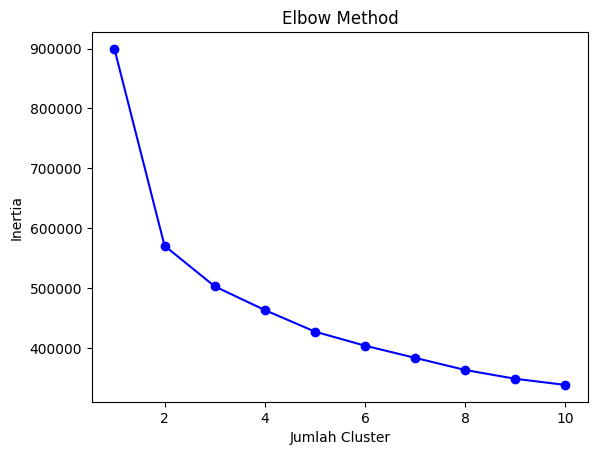

In [27]:
X = df_clean[['Work_stress', 'Life_satisfaction', 'Mental_health_state', 'Age',
              'Worked_job_business', 'Work_hours ', 'working_status ', 'Mood_disorder',
              'Anxiety_disorder', 'Gen_health_state', 'Marital_status', 'Gender', 'Total_income']]

inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [28]:
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'Jumlah Cluster: {k}, Silhouette Score: {score:.4f}')

Jumlah Cluster: 2, Silhouette Score: 0.3435
Jumlah Cluster: 3, Silhouette Score: 0.2412
Jumlah Cluster: 4, Silhouette Score: 0.2325
Jumlah Cluster: 5, Silhouette Score: 0.1787
Jumlah Cluster: 6, Silhouette Score: 0.1762
Jumlah Cluster: 7, Silhouette Score: 0.1652
Jumlah Cluster: 8, Silhouette Score: 0.1754
Jumlah Cluster: 9, Silhouette Score: 0.1786
Jumlah Cluster: 10, Silhouette Score: 0.1882


In [33]:
kmeans = KMeans(n_clusters=2)

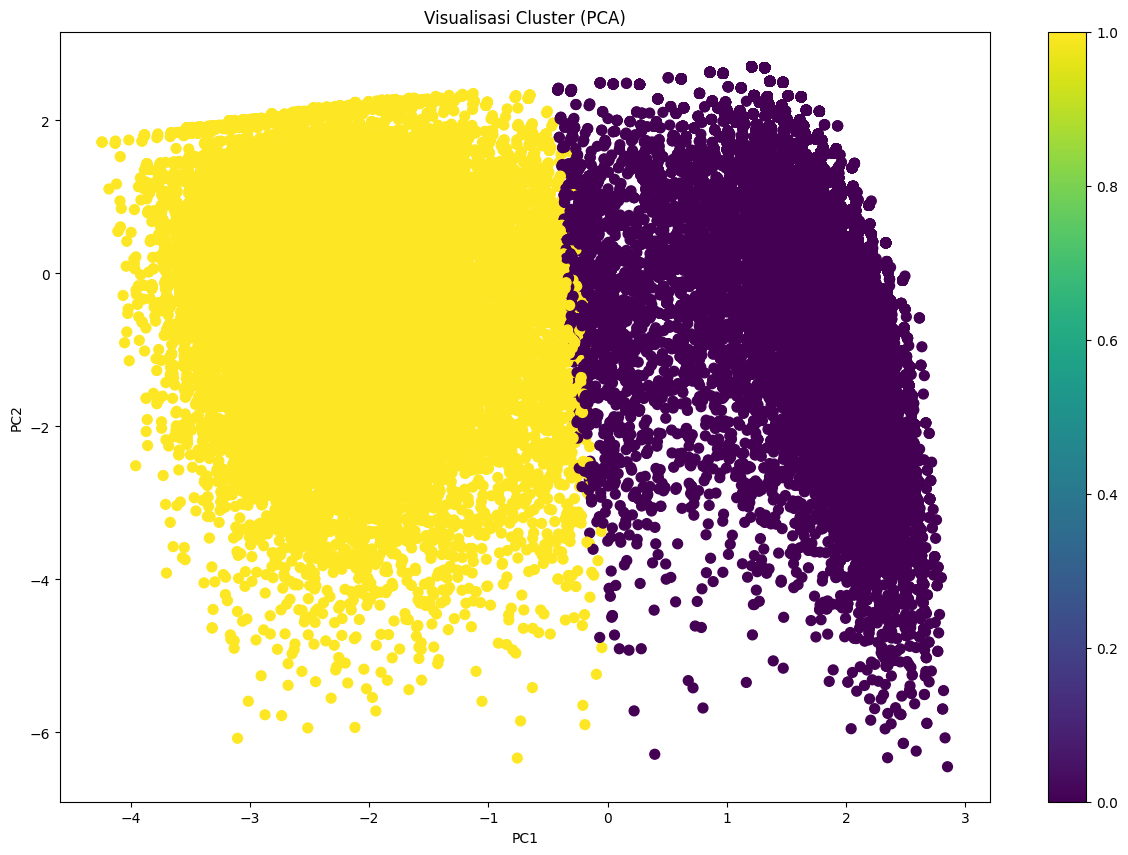

In [34]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels, cmap='viridis', s=50)
plt.title('Visualisasi Cluster (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()